In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("eye_cancer_patients.csv")
df.head()

,Patient_ID,Age,Gender,Cancer_Type,Laterality,Date_of_Diagnosis,Stage_at_Diagnosis,Treatment_Type,Surgery_Status,Radiation_Therapy,Chemotherapy,Outcome_Status,Survival_Time_Months,Genetic_Markers,Family_History,Country
0,PID00001,58,F,Retinoblastoma,Left,2019-01-25,Stage IV,Radiation,False,15,3,Deceased,85,NaN,True,UK
1,PID00002,15,Other,Retinoblastoma,Right,2021-10-21,Stage III,Chemotherapy,True,69,6,In Remission,10,NaN,True,Japan
2,PID00003,64,M,Retinoblastoma,Bilateral,2021-03-12,Stage IV,Surgery,False,47,6,In Remission,3,BRAF Mutation,False,UK
3,PID00004,33,M,Melanoma,Right,2021-05-10,Stage II,Radiation,True,36,6,Active,40,NaN,False,Canada
4,PID00005,8,Other,Lymphoma,Left,2019-11-24,Stage I,Chemotherapy,False,14,14,In Remission,26,BRAF Mutation,True,USA


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            5000 non-null   object
 1   Age                   5000 non-null   int64 
 2   Gender                5000 non-null   object
 3   Cancer_Type           5000 non-null   object
 4   Laterality            5000 non-null   object
 5   Date_of_Diagnosis     5000 non-null   object
 6   Stage_at_Diagnosis    5000 non-null   object
 7   Treatment_Type        5000 non-null   object
 8   Surgery_Status        5000 non-null   bool  
 9   Radiation_Therapy     5000 non-null   int64 
 10  Chemotherapy          5000 non-null   int64 
 11  Outcome_Status        5000 non-null   object
 12  Survival_Time_Months  5000 non-null   int64 
 13  Genetic_Markers       2503 non-null   object
 14  Family_History        5000 non-null   bool  
 15  Country               5000 non-null   

In [3]:
df.describe()

,Age,Radiation_Therapy,Chemotherapy,Survival_Time_Months
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.008000,35.447600,10.057400,60.716000
std,25.934387,20.565754,6.030968,34.549774
min,1.000000,0.000000,0.000000,1.000000
25%,22.000000,18.000000,5.000000,31.000000
50%,44.000000,35.000000,10.000000,60.000000
75%,67.000000,53.000000,15.000000,90.000000
max,90.000000,70.000000,20.000000,120.000000


In [4]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Cancer_Type                0
Laterality                 0
Date_of_Diagnosis          0
Stage_at_Diagnosis         0
Treatment_Type             0
Surgery_Status             0
Radiation_Therapy          0
Chemotherapy               0
Outcome_Status             0
Survival_Time_Months       0
Genetic_Markers         2497
Family_History             0
Country                    0
dtype: int64

In [5]:
df["Date_of_Diagnosis"] = pd.to_datetime(df["Date_of_Diagnosis"])

In [6]:
df["Treatment_Received"] = df.apply(
    lambda row: "Yes" if (row["Radiation_Therapy"] > 0 or row["Chemotherapy"] > 0 or row["Surgery_Status"]) else "No",
    axis=1
)

In [7]:
df["Survival_Category"] = pd.cut(
    df["Survival_Time_Months"],
    bins=[-1, 12, 36, 60, float("inf")],
    labels=["<1 yr", "1-3 yrs", "3-5 yrs", "5+ yrs"]
)

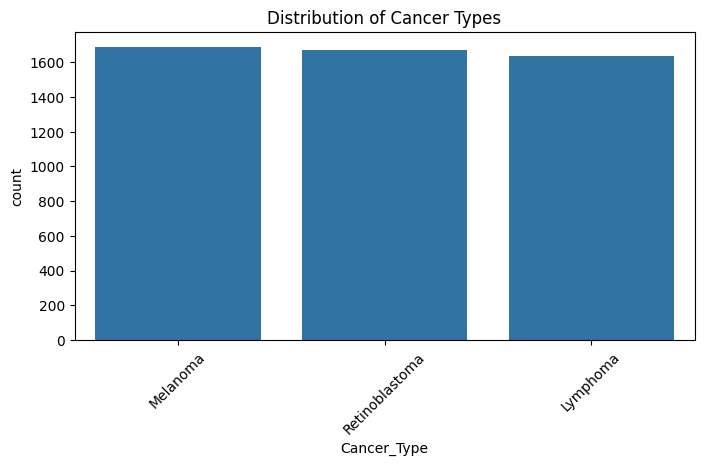

In [8]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Cancer_Type", order=df["Cancer_Type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Cancer Types")
plt.show()

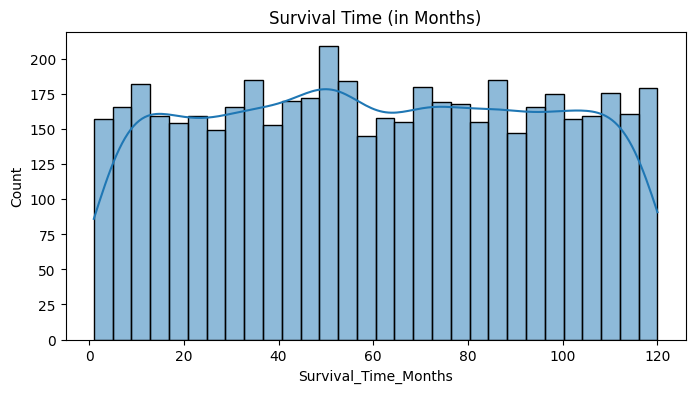

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Survival_Time_Months"], bins=30, kde=True)
plt.title("Survival Time (in Months)")
plt.show()

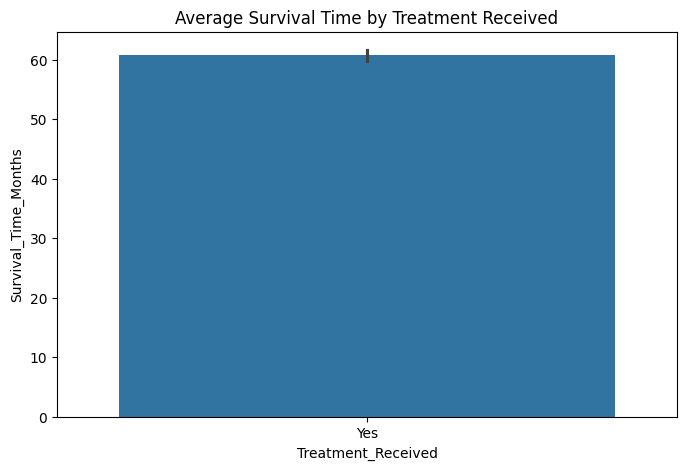

In [10]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Treatment_Received", y="Survival_Time_Months")
plt.title("Average Survival Time by Treatment Received")
plt.show()

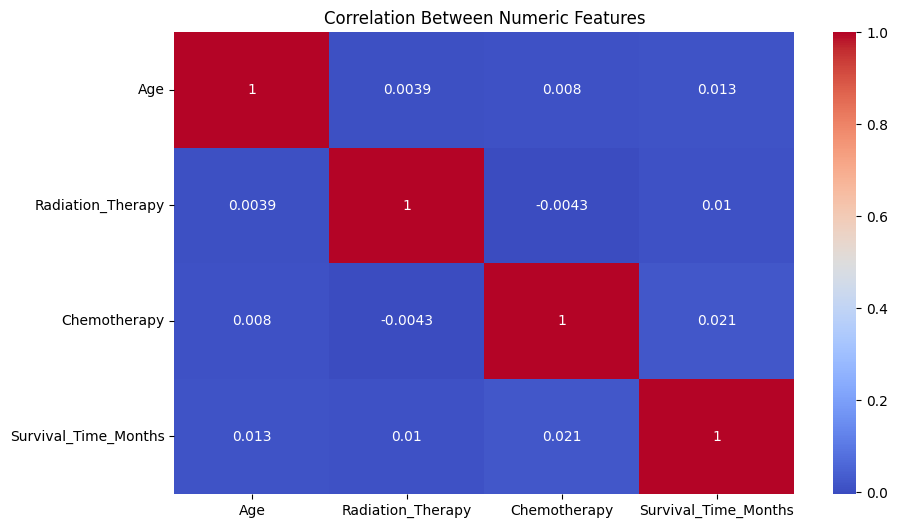

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=["int64"]).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.show()